# Assignment #03 - Implement a simple project



Data Science / spring 1401, University of kordestan



---



**Please pay attention to these notes:**
<br><br>


- **Assignment Due:** <b><font color='red'>1401/4/7</font></b> 23:59:00
- The items you need to answer are highlighted in <font color="purple">**bold purple**</font> and the coding parts you need to implement are denoted by:
```
########################################
#     Put your implementation here     #
########################################
```
- We always recommend co-operation and discussion in groups for assignments. However, **each student has to finish all the questions by him/herself**. If our matching system identifies any sort of copying, you'll be responsible for consequences.
- You must run this notebook on Google Colab platform, it depends on Google Colab VM for some of the depencecies.
- You can double click on collapsed code cells to expand them.
- <b><font color='red'>When you are ready to submit, please follow the instructions at the end of this notebook.</font></b>


<br>




---



# 3 . Sentiment Analysis

Now that you have worked with two type of data (tabular, image), let's step into a new genre, **Text**! From another point of view, you already encountered *clustering* as a major class of unsupervised learning. Now we will face a **Classification** problem, from the category of supervised learning problems. (Some other types of problems/tasks are listed in [section 5](https://www.deeplearningbook.org/contents/ml.html).1.1 of the deeplearningbook.)

Here in the last assignment, the main task is to classify [user comments on Digikala products](https://www.digikala.com/opendata/) into three classes:
<font color="green">
* Positive
</font>
* Neutral
<font color="red">
* Negative
</font>

We will follow a step by step procedure together:


1. <font color="green"> Load, clean our (or more precisely *Digikala's*) datset with **pandas**
</font>
<font color="green">
2. Transform data, define and fit our model on the data using **scikit-learn**
</font>
<font color="green">
3. Evaluate our model based on quantitative measures and manual (qualitative) inspection
</font>


Let's start by downloading the data...

In [1]:
#@title Download the data!
from IPython.display import clear_output

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1lb7gyXkI4Cs4Pp038_iKrcnVg9yeQcou' -O digikala_comments.xlsx

clear_output()
print("Done")

Done


In [2]:
# @title Read xlsx data
import pandas as pd
df = pd.read_excel('/content/digikala_comments.xlsx')
df.head(3)

,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages
0,3692,ماوس بی‌سیم لاجیتک مدل M325,IT,989472,0,0,verified,\N,NaN,واقعا عالیه. من که ازش خیلی راضیم,NaN,NaN
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,AC,3862150,4,1,verified,recommended,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""ا...","[""ندارد""]"
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,626843,1,0,verified,not_recommended,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,NaN,NaN


There are many columns in the table, but we need only two of them. The easier one is the `comment` column as the textual input to our problem. what about the other (the output / answer / label / target...)?

As the data does not contain the score submitted by users, we use another column that shows polarity of the user opinion about the product. It's the `recommend` column. When the user recommends others to buy the product, he/she surely thinks positive about that product and vice-versa. right? <font color="purple">**Have any problem with this? Explain it.**</font>



<font color="purple">  --- **Put your answer here!** ---</font>
</br>


Maybe you're right, but we have no way out of this! :)
If we dont take it hard about the label, we are doing [Sentiment Analysis](https://en.wikipedia.org/wiki/Sentiment_analysis) on the user comments...

## Clean dataset

Our label column is one of these values for each comment:

In [3]:
df.recommend.unique()

array(['\\N', 'recommended', 'not_recommended', 'no_idea'], dtype=object)

<font color="purple">**Add a new column named `label` to the DataFrame based one the `recommend` column. assign `1`, `0`, `-1` values to `recommended`, `no_idea`, `not_recommended`, respectively.**</font>


In [4]:
#@title Your part #1
import numpy as np

label = []
for row in df['recommend']:
        if row == 'recommended' :    label.append('1')
        elif row == 'no_idea':   label.append('0')
        elif row == 'not_recommended' :  label.append('-1')
        else: label.append(np.nan)

df['label'] = label

df.head(3)

,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages,label
0,3692,ماوس بی‌سیم لاجیتک مدل M325,IT,989472,0,0,verified,\N,NaN,واقعا عالیه. من که ازش خیلی راضیم,NaN,NaN,NaN
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,AC,3862150,4,1,verified,recommended,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""ا...","[""ندارد""]",1
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,626843,1,0,verified,not_recommended,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,NaN,NaN,-1


<font color="purple">**Drop rows with missing values of `recommend` (any value other than `recommended`, `no_idea`, `not_recommended`).**</font>

In [5]:
#@title Your part #2
df = df.dropna(subset=['label'])

len(df)

63618

<font color="purple">**Drop all useless columns, including the old `recommend` column.**</font> Dont doubt if it seems too easy! :)

In [6]:
#@title Your part #3

df = df.drop(["product_id","product_title","title_en" , "user_id" , "likes" ,"dislikes",
               "verification_status","recommend", "title","advantages", "disadvantages"],axis= 1)

df.head(10)

,comment,label
1,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,1
2,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,-1
3,همه چیز در رابطه با ظاهر این گوشی بسیار خوب اس...,0
4,اگر ظرفیتش براتون کافیه حتما بخرید._x000D_\nیه...,0
5,سلام دوستان،،_x000D_\nمنم مثه بعضی از دوستان ق...,1
6,من چند سالی هست که این اسپیکرو خریدم و واقعا ح...,1
9,خوب بودممنون,0
10,نزدیک به دو ساله که این هارد رو خریدم. استفاده...,1
12,افا از وقتی من اینو واسه پسرم خریدم همه بچه ها...,1
13,من این پاور بانک رو حدود یک سال پیش از دیجی کا...,1


Now let's check the `comment` column. How about its character lenght?

**First Change `df` in the below cell to your current version of DataFrame!**

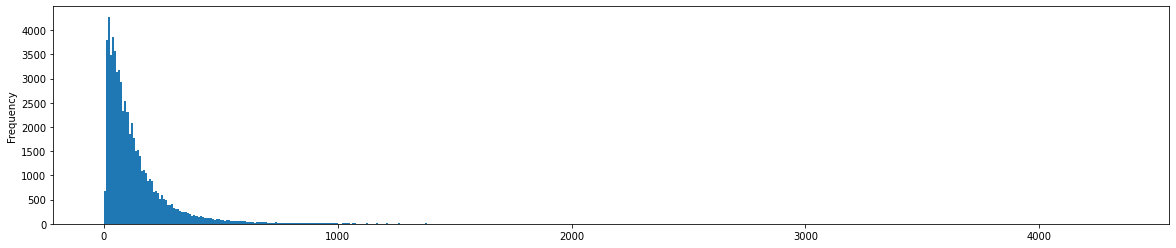

In [7]:
# @title Frequency of comments by char length
hist = df.comment.str.len().plot.hist(bins=500, figsize=(20, 4))

As you see in the histogram, some comments are too short and some others are toooo long.

<font color="purple">**Choose values which you think are the best for min and max character length of comments and drop those short/long comments.**</font>

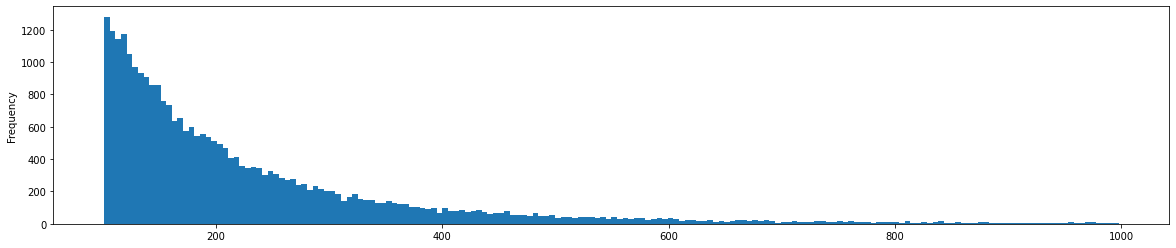

In [8]:
MIN_CHAR_LEN = 100 #@param {type:"integer"}
MAX_CHAR_LEN = 1000 #@param {type:"integer"}

#############
clean_df = df[(df.comment.str.len() > MIN_CHAR_LEN) & (df.comment.str.len() < MAX_CHAR_LEN)]
#############

hist = clean_df.comment.str.len().plot.hist(bins=(MAX_CHAR_LEN-MIN_CHAR_LEN)//5, figsize=(20, 4))

It's time to check how many examples are remaining for each label...

In [9]:
print('label\tcount')
clean_df.label.value_counts()

label	count


1     15929
-1     7435
0      5093
Name: label, dtype: int64

Seems more than half of the comments are labeled positive! This means we have an **unbalanced** dataset and this is bad news!

We don't know how to deal with an unbalanced data (Is it realy a special case?), so <font color="purple">**make the dataset balanced by taking maximum possible equal number of examples for each label.**</font>

In [10]:
#@title Your part #4
balanced_df = clean_df.groupby('label').apply(lambda x: x.sample(min(clean_df.label.value_counts())))

print('label\tcount')
balanced_df.label.value_counts()

label	count


-1    5093
0     5093
1     5093
Name: label, dtype: int64

...and say goodbye to pandas, by extracting values of comments, labels from the final DataFrame (next cell).

In [11]:
texts = balanced_df.comment.astype(str).values
labels = balanced_df.label.values

list(zip(texts[:3], labels[:3]))

[('اصلا پیشنهاد نمیکنم برای جهیزیه خرید کردم اندازه ها یک شکل نبودن و پشت همه اونها پر از لکه هایی بود که نمی رفت و فوق العاده نازک در کل افتضاح',
  '-1'),
 ('سلام خدمت دوستان_x000D_\nبنده ۲ تا از این محصول رو خریدم که همون بار اول موقع تغییر رمز خراب شدن._x000D_\nکلا پیشنهاد نمیشه.',
  '-1'),
 ('با دیدن سایتشون فکر کردم چقدر ایده شون باحاله و چقدر قشنگه بعدش که رسید دستم دیدم اصلا اون چیزی که فکر میکردم نیست._x000D_\nبدتر اینکه اصلا سایز گوشیم نبود._x000D_\nفکر میکردم دورتادور گوشیمو میگیره بعدش کهه زدم دیدم حتی پشت گوشیم رو هم کامل نمیپوشونه. در صورتی که خیلی حواسم بود که مدل گوشیرو درست زده باشم.',
  '-1')]

It is a common practice to split datasets into separate train and test sets. in order to evaluate the generalization power of our model, the model shouldn't have seen any examples from test set.

We take 20% of the examples as test set and will not use them until evaluation part...

In [12]:
# @title Split dataset 

from sklearn.model_selection import train_test_split

texts_train, texts_test, labels_train, labels_test = train_test_split(
    texts, labels, test_size=0.20,
    random_state=10, 
    stratify=labels      # what does it do?
  )     
print(len(texts))
len(texts_train), len(texts_test)

15279


(12223, 3056)

## Vectorize Text

We cannot give text as a string input to a machine learning model, because they can understand numerical vectors. How do you make a numerical vector out of a (problably long) string?!
<font color="green">
* It already has a numerical (binary) representation in system memory? Riiight, But... 
* Split text it into smaller parts? good idea! into what? word or character or...? and then?</font>

First we wil split our text into words, as they are the smallest meaningful units of text. This is called **tokenizing**. As the comments are in Persian, it is better to use a Persian tool to process our comment. We (install and) use [hazm](https://github.com/sobhe/hazm/) just to tokenize comments, but it has much more to do... Another library for processing Persian is [parsivar](https://github.com/ICTRC/Parsivar). 

Check those libraries if you are realy interested in NLP...

In [13]:
# @title install hazm
from IPython.display import clear_output
!pip install hazm
clear_output()

In [14]:
# @title Tokenize a comment
from hazm import word_tokenize

word_tokenize(texts_train[10])

['رایحه',
 'خوبی',
 'داره',
 'ولی',
 'پخش',
 'بو',
 'بسیار',
 'ضعیفه',
 'روی',
 'پوست',
 'ماندگاری',
 'نداره',
 'ولی',
 'روی',
 'لباس',
 'چند',
 'ساعتی',
 'رایحه',
 'ضعیفی',
 'رو',
 'میشه',
 'ازش',
 'استشمام',
 'کرد',
 'بر',
 'عکس',
 'بوی',
 'ضعیف',
 'ظاهر',
 'بطری',
 'زیبا',
 'و',
 'با',
 'کیفیته',
 'و',
 'مثل',
 'عطرهای',
 'فیک',
 'نیست',
 'ولی',
 'نمیدونم',
 'چرا',
 'بویی',
 'به',
 'این',
 'ضعیفی',
 'داره']

After tokenization, we use one of the simplest methods of vectorizing/representing text, [Bag-of-Words](https://en.wikipedia.org/wiki/Bag-of-words_model).

You can learn about **B**ag-**o**f-**W**ords [here](https://maelfabien.github.io/machinelearning/NLP_2). In a single sentence, it turns a text into a n-dimensional integer vector, where each item indicates number of ocurrances of a specific word in the text.

<font color='purple'>**Is Bag-of-Words a good representation of text? Does it miss some useful information? Is it possible that BoW makes a positive comment look like negative, vice-versa? Explain by giving examples.**</font> 


<font color="orange">1- One of most important problems could be that it shows the frequency of some words that do not give us useful information, infact

2- In another hand it decreases importancy of keywords by showing a less number of their frequency</font>
</br>

If you know how BoW works, it's time to get our hands dirty with scikit-learn. BoW is implemented as `CountVectorizer` there...

In [15]:
# @title Count Vectorizer (BoW)
from sklearn.feature_extraction.text import CountVectorizer

MIN_DF =  0.1# @param {"type": "number"}
MAX_DF =  0.5# @param {"type": "number"}
MAX_FEATURES =  7# @param {"type": "integer"}

vectorizer = CountVectorizer(
    tokenizer=word_tokenize,
    min_df=MIN_DF,
    max_df=MAX_DF,
    max_features=MAX_FEATURES
)

?vectorizer   # shows documentation for the vectorizer object

In [16]:
X_train = vectorizer.fit_transform(texts_train)     # returns a sparse matrix (not dense)
X_test = vectorizer.transform(texts_test)

y_train = labels_train
y_test = labels_test

X_train.todense().shape, X_test.todense().shape     # convert sparse to dense matrix (normal 2d array)

((12223, 7), (3056, 7))

<font color='purple'>**Read scikit-learn docs on `CountVectorizer` and explain what is the meaning and benefit of setting these parameters:**
* **min_df**
* **max_df**
</font>


<font color="orange">  1 - min_df is used for removing terms that appear too infrequently. For example: min_df = 0.01 means "ignore terms that appear in less than 1% of the documents

2-max_df is used for removing terms that appear too frequently, also known as corpus-specific stop words" For example:
max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".</font>
</br>

## Fit, Evaluate Classifier

We chose **K-Nearest-Neighbor** model to fit on our data. As the name clearly suggests, KNN predicts the class of a new data point, by voting from k nearest neighbors of it (from training set). Neighbours are computed using a distance measure in our feature space.

Here you can see how KNN works in a 2D input space:

<img src="https://machinelearningknowledge.ai/wp-content/uploads/2018/08/KNN-Classification.gif" width="640px">

This model and some other similar models are explained in [scikit-learn tutorial](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification).

Let's fit and evalute the model with a few lines of code...

In [17]:
# @title Define, Fit KNN model
%%time
from sklearn.neighbors import KNeighborsClassifier

K =  5# @param {"type": "integer"}

classifier = KNeighborsClassifier(n_neighbors=K)
classifier.fit(X_train, y_train)

CPU times: user 33.4 ms, sys: 3.08 ms, total: 36.4 ms
Wall time: 109 ms


In [18]:
%%time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pred_test = classifier.predict(X_test)
print(accuracy_score(y_test, pred_test))

0.3367146596858639
CPU times: user 1.26 s, sys: 309 ms, total: 1.57 s
Wall time: 1.61 s


As you can see, fitting KNN on data takes no time. But using it for prediction (on smaller count of data) takes considerable time!

This is because KNN is a **lazy model** or a [lazy learning algorithm](https://en.wikipedia.org/wiki/Lazy_learning)! All of its computations are happening at inference/prediction time. Fitting the model just stores training data to use it later!

By changing parameter `K` in the cells above, you will see it has a significant effect on accuracy of the model. The question is *which k value, leads to the highest accuracy?* A deeper question would be *which evaluation metric (other than accuracy) best describes the quality of our model?* 

First, add three new items to your set of evaluation metrics:
* [Precision](https://en.wikipedia.org/wiki/Precision_and_recall)
* [Recall](https://en.wikipedia.org/wiki/Precision_and_recall)
* [F1-Score](https://en.wikipedia.org/wiki/F-score)

If you're not familiar with each one, read enough to understand it deeply. You will see them everywhere in machine learning literature. 

Now we are going to search for best value of k to maximize an evaluation metric. There are standard ways to do parameter search in scikit-learn, but let's do it our way, visualy. We want to plot the result of each metric for different values of k, to gain insight about how k affects model quality.

<font color="purple">**Implement the `plot_metrics_by_k` function which plots the score of the model on test set based on each metric, given a list of k values `ks`.**
* **Plot each metric separately (4 plots in total).**
* **Use logarithmic scale on horizontal axis (k).**
* **Precision, Recall, F1-Score are calculated separately for each label (3 lines in each plot).**</font>

Scikit-learn has implemented functions for each metric. You'll need to prepare labels and model predictions for them and do some dirty work with matplotlib! :)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


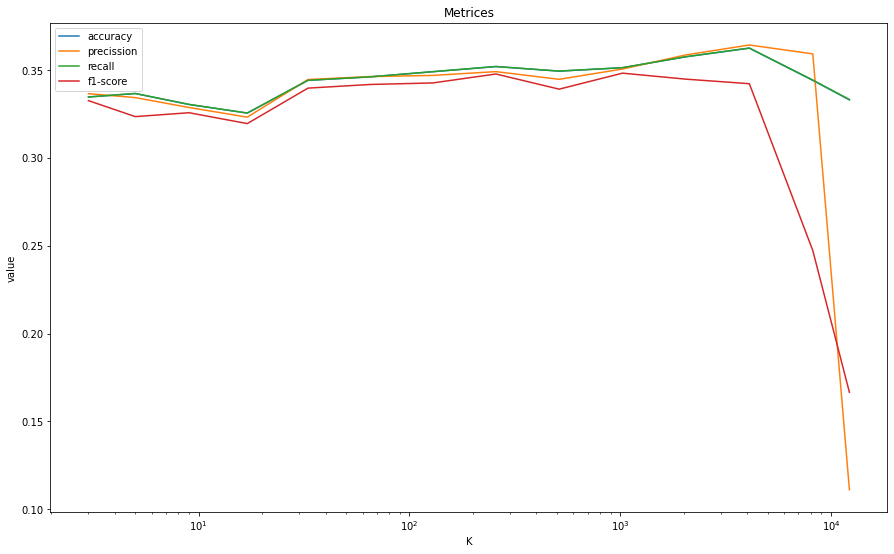

In [19]:
#@title Your part #5

import math
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def plot_metrics_by_k(ks, X_train, y_train, X_test, y_test):

  accuracy = list()
  precission = list()
  recall = list()
  f1 = list()

  for i in range(len(ks)):
    classifier = KNeighborsClassifier(n_neighbors=ks[i])
    classifier.fit(X_train, y_train)
    pred_test = classifier.predict(X_test)

    accuracy.append(accuracy_score(y_test, pred_test))
    precission.append(precision_score(y_test, pred_test, average='macro'))
    recall.append(recall_score(y_test, pred_test, average='macro'))
    f1.append(f1_score(y_test, pred_test, average='macro'))

  fig, ax = plt.subplots(figsize=(15, 9))

  ax.plot(ks, accuracy, label='accuracy')
  ax.plot(ks, precission, label='precission')
  ax.plot(ks, recall, label='recall')
  ax.plot(ks, f1, label='f1-score')

  ax.set(xlabel="K", ylabel="value", title="Metrices")

  ax.legend()
  ax.set_xscale("log")
  plt.show()


ks = [2**i+1 for i in range(1, int(math.log(X_train.shape[0], 2))+1)] + [X_train.shape[0]]
plot_metrics_by_k(ks, X_train, y_train, X_test, y_test)




<font color="purple">**According to the plots:**
1. **Which value of K leads to highest model quality? (Based on which metric?)**</font>
2. <font color="purple">**What happens to the model when we increase k too much (based on each metric)? Why?**</font>


<font color="purple">  --- **Put your answer here!** ---</font>
</br>

If you are not satisfied with the quality of your classifier (or even if you are!), you can improve it in many ways. One of them is using a better vectorizer.

There is an extension to BoW, called **Term Frequency-Inverse Document Frequency (TF-IDF)**. Read about it [here](https://maelfabien.github.io/machinelearning/NLP_2). And You can use it with the same parameters from `CountVectorizer`.

In [31]:
# @title TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

MIN_DF = 0.2 # @param {"type": "number"}
MAX_DF =  0.7 # @param {"type": "number"}
MAX_FEATURES =  7# @param {"type": "integer"}

vectorizer = TfidfVectorizer(
    tokenizer=word_tokenize,
    min_df=MIN_DF,
    max_df=MAX_DF,
    max_features=MAX_FEATURES
)

In [32]:
X_train = vectorizer.fit_transform(texts_train)     # returns a sparse matrix
X_test = vectorizer.transform(texts_test)

X_train.todense().shape, X_test.todense().shape

((12223, 7), (3056, 7))

Plot the test accuracy again with the new training, test set, transformed by TF-IDF...

In [33]:
ks = [2**i+1 for i in range(1, int(math.log(X_train.shape[0], 2))+1)] + [X_train.shape[0]]
# plot_accuracy_by_k(ks, X_train, y_train, X_test, y_test)


<font color="purple">**Did TF-IDF improve the results significantly? If true, explain why?**</font>


<font color="purple">  --- **Put your answer here!** ---</font>
</br>

## Manual Inspect

Pick the best parameters for your KNN model. Also make sure the correct version of data (vectorized by best vectorizer) is used to fit the model...


In [34]:
# @title Define, Fit best model

from sklearn.neighbors import KNeighborsClassifier

K = 7 # @param {"type": "integer"}

classifier = KNeighborsClassifier(n_neighbors=K)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

By looking at the Confusion Matrix below, you can see which label is harder for the model to predict...

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


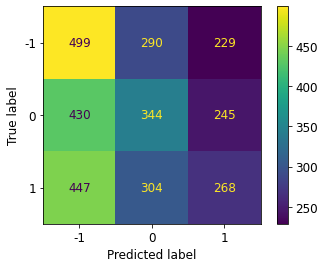

In [35]:
# @title Plot Confusion Matrix

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 12

plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

<font color="purple">**According to the confusion matrix,**
1. **Predicting which label is the easiest for the model?**</font>
2. <font color="purple">**Which one is the hardest? Why?**</font>
3. <font color="purple">**Which label does the model confuse the hardest one with!?!? Why?**
</font>


<font color="orange">1- The one with maximum number
</br>
2- The smallest one because our data is not enough in this part
</br>
3- predicred label = -1 & true label = 1 because in the wrong predicts it has maximum value</font>
</br>

Now that you know the weakness point of your model, let's manually test it to see if the numbers are right about it, or not?

in the following code cell, you can input your desired text, see the sentiment predicted by model, and see which examples are nearest neighbors of the input and cause the model to make that prediction.

In [39]:
# @title Get Neighbors
text = "\u062E\u0648\u0628 \u0646\u06CC\u0633\u062A" # @param {"type": "string"}

x = vectorizer.transform([text])

print('predicted sentiment:\t', classifier.predict(x), '\n')
distances, indexes = classifier.kneighbors(x)

for distance, index in zip(distances[0], indexes[0]):
  print(f'label: {labels_train[index]}\ndistance:{distance}\n{texts_train[index]}\n')
# neighbors

predicted sentiment:	 ['-1'] 

label: -1
distance:0.0
در مجموع برای اینکه کلاس بذاریم و در بین رقبا ما هم با قلم کار کنیم خوبه و گرنه کیفیت کارش با نوک پهنش خیلی مناسب نیست

label: 0
distance:0.0
واقعا کیفیتش خوبه ولی کاشکی دیجی داخل توضیحات نمیزد واسه تبلت ۱۰.۲ میگذرد تبلت نمیخوره درسته کیفیتش عالیه ولی برای من بی استفاده شده چون بدرد تبلت نمیخوره

label: -1
distance:0.0
کیفیتش اصلا خوب نیست و زود میشکنه هوشمند هم نیست و فقط با سنسور مجاورت کار میکنه ک با یه نرم‌افزار کار می کنه

label: 0
distance:0.0
س رو خیلی ضعیف میکنه،دکمه کناره ها هم خیلی باید فشار بدی تا عمل کنه,خیلی هم گنده هست ولی در کل قاب باحالی

label: 0
distance:0.0
خوش بو هست 
گرم و شیرین مناسب زمستان 
خیلی هم شیکه
ولی ماندگاری شاید ۱۰ دقیقه
با قیمت پایینتر ادکلن های ماندگاری بیشتر میتونید بخرید 


label: -1
distance:0.0
معلوم نیست برای چه مدل گوشی ساخته شده مثلا گوشیه من A5سامسونگ اصلا داخله کیف نمیره درکل فقط یکم ظاهر داره ولی اصلا توصیه نمیکنم

label: 1
distance:0.0
خیلی قشنگه خیلی ها میپرسن کجا خریدی و اینکه خیلی خاصه

<font color="purple">**Based on manual inspection, which one of the followings is the main source of errors?**
1. **The KNN algorithm**
2. **The vectorization method**
3. **Tokenization**
3. **Or the dataset**
**No problem if you feel that everyone is guilty! :)
Justify your explanation with examples.**
</font>


<font color="purple">  --- **Put your answer here!** ---</font>
</br>